## Import numpy, pandas, and pyplot

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read in data

In [84]:
avo_df = pd.read_csv('avocado.csv')

## convert Date column to datetime type and sort by Date

In [85]:
avo_df["Date"] = pd.to_datetime(avo_df["Date"])
avo_df.sort_values("Date", inplace=True)

## Set the style to bmh

In [9]:
plt.style.use('bmh')

## Create stacked subplots with a histogram on the top and a boxplot on the bottom
First, create a filtered DataFrame that contains only information on conventional avocados sold in Tampa in 2016
Then, plot the distribution of Total Volume as both a histogram (top subplot) and a boxplot (bottom subplot)

* Set the figsize to (8, 8) 
* Set the xaxis to be shared by both plots
* Outline the histogram bins in white
* Rotate the boxplot to be horizonal
* Set the boxplot's label to an empty string
* Label the Figure and Axes as appropriate
* At the very end, place a call to `plt.tight_layout()` This will reduce the amount of space between the two plots and generally maximize the space. 

After you create the initial plot, re-set the bins to break on round numbers. 

In [82]:
tampa_2016_conv = avo_df.loc[(avo_df["region"] == "Tampa") &
                            (avo_df["Date"].dt.year == 2016) &
                            (avo_df["type"] == "conventional")]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8595e843d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8595b6fd50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8595e84450>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8595b617d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8595b61cd0>],
 'means': []}

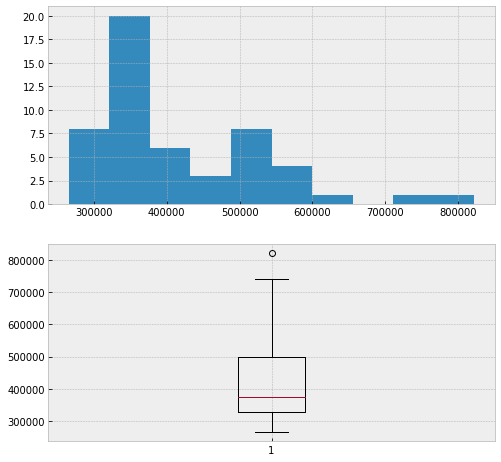

In [87]:
fig, axs = plt.subplots(2, figsize=(8,8))
axs[0].hist(tampa_2016_conv["Total Volume"])
axs[1].boxplot(tampa_2016_conv["Total Volume"])

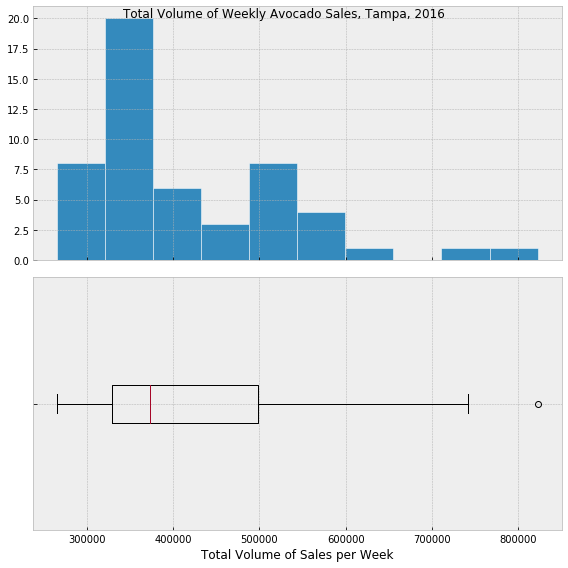

In [83]:
fig, axs = plt.subplots(2, figsize=(8,8), sharex=True)
axs[0].hist(tampa_2016_conv["Total Volume"], edgecolor='white')
axs[1].boxplot(tampa_2016_conv["Total Volume"], vert=False, labels=[''])
axs[1].set_xlabel("Total Volume of Sales per Week")
fig.suptitle("Total Volume of Weekly Avocado Sales, Tampa, 2016")
plt.tight_layout()

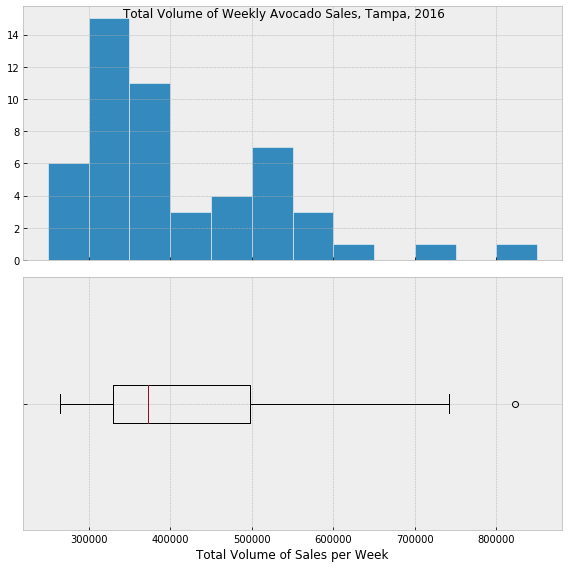

In [50]:
custom_bins = np.arange(250000, 900000, 50000)

fig, axs = plt.subplots(2, 
                        figsize=(8,8), 
                        sharex=True)

axs[0].hist(tampa_2014_conv["Total Volume"], 
                        edgecolor='white', 
                        bins=custom_bins)

axs[1].boxplot(tampa_2014_conv["Total Volume"], 
                        vert=False, 
                        labels=[''])

axs[1].set_xlabel("Total Volume of Sales per Week")
fig.suptitle("Total Volume of Weekly Avocado Sales, Tampa, 2016")
plt.tight_layout()


KC: Approximately what percentage of weeks saw sales of more than 500,000 units? 
A: 25% 

## Create a grid of subplots to compare sales

Create a 2 row by 3 column collection of subplots showing the following 
upper row: conventional avocado sales (Total Volume) in the PhoenixTucson market over time for the years 2015, 2016, and 2017 (each year should appear on a different plot)
lower row: organic avocado sales in the PhoenixTucson market over time for the years 2015, 2016, and 2017

The plots should all have the same x-axis. After displaying your first draft of the plots, use the ax.set_ylim() method to adjust the y-axis so that every y-axis on the top row is the same, and every y-axis on the bottom row is the same. All y-axes should also start from zero. 

* figsize (15,10)

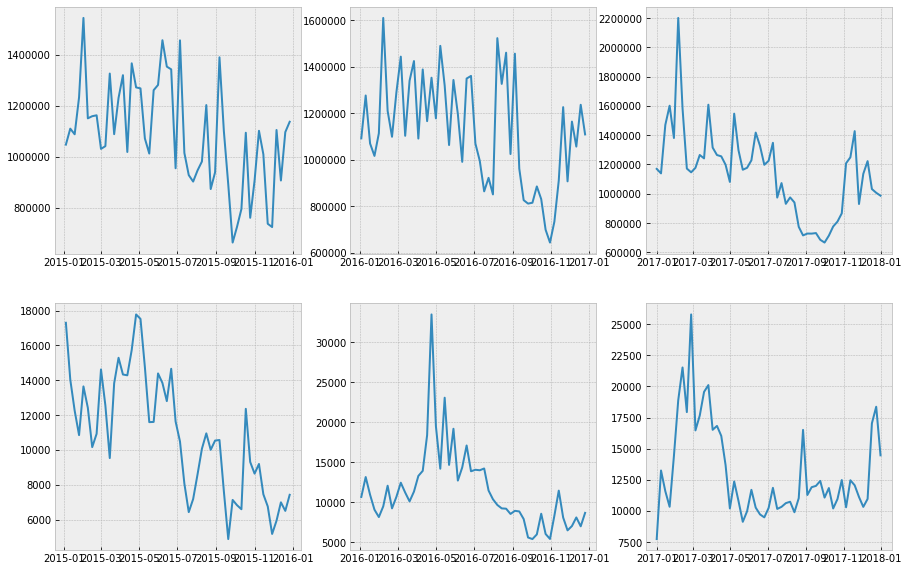

In [88]:
phxtuc_conv_df = avo_df.loc[(avo_df["region"]=="PhoenixTucson") & (avo_df["type"] == "conventional")]
phxtuc_org_df = avo_df.loc[(avo_df["region"]=="PhoenixTucson") & (avo_df["type"] == "organic")]


fig, axs = plt.subplots(2,3, figsize=(15,10))

# loop through all years, conventional
for i, year in enumerate([2015, 2016, 2017]):
    yr_df = phxtuc_conv_df.loc[phxtuc_conv_df["Date"].dt.year==year]    
    axs[0][i].plot(yr_df["Date"], yr_df["Total Volume"])
    
    
# loop through all year, organic
for i, year in enumerate([2015, 2016, 2017]):
    yr_df = phxtuc_org_df.loc[phxtuc_org_df["Date"].dt.year==year]    
    axs[1][i].plot(yr_df["Date"], yr_df["Total Volume"])



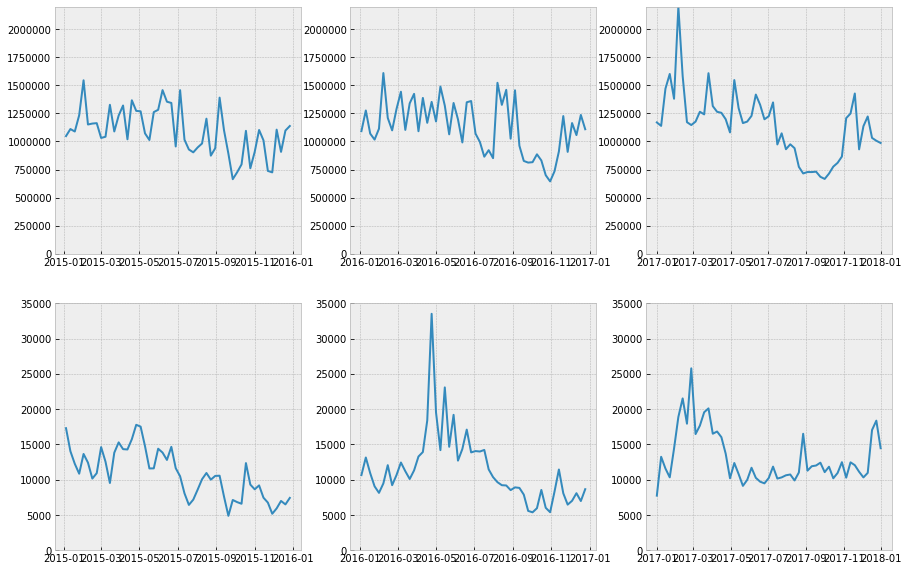

In [56]:
fig, axs = plt.subplots(2,3, figsize=(15,10))

# loop through all years, conventional
for i, year in enumerate([2015, 2016, 2017]):
    yr_df = phxtuc_conv_df.loc[phxtuc_conv_df["Date"].dt.year==year]    
    axs[0][i].plot(yr_df["Date"], yr_df["Total Volume"])
    axs[0][i].set_ylim(0, 2200000)   
    
# loop through all year, organic
for i, year in enumerate([2015, 2016, 2017]):
    yr_df = phxtuc_org_df.loc[phxtuc_org_df["Date"].dt.year==year]    
    axs[1][i].plot(yr_df["Date"], yr_df["Total Volume"])
    axs[1][i].set_ylim(0, 35000)


create a list of 3 colors (suggestion: 'tab:blue', 'tab:orange', 'tab:green'). Then, acccess each color in turn so that the 2015 plots both have the same color, 2016 plots both have the same color, and 2017 plots both have the same color. 

In [57]:
colors = ['tab:blue', 'tab:orange', 'tab:green']

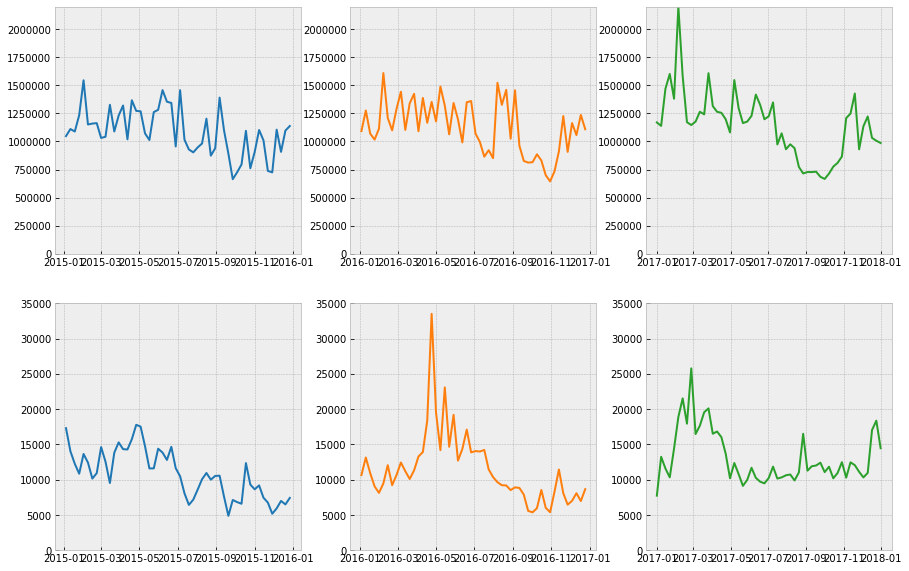

In [58]:
fig, axs = plt.subplots(2,3, figsize=(15,10))

# loop through all years, conventional
for i, year in enumerate([2015, 2016, 2017]):
    yr_df = phxtuc_conv_df.loc[phxtuc_conv_df["Date"].dt.year==year]    
    axs[0][i].plot(yr_df["Date"], yr_df["Total Volume"], color=colors[i])
    axs[0][i].set_ylim(0, 2200000)   
    
# loop through all year, organic
for i, year in enumerate([2015, 2016, 2017]):
    yr_df = phxtuc_org_df.loc[phxtuc_org_df["Date"].dt.year==year]    
    axs[1][i].plot(yr_df["Date"], yr_df["Total Volume"], color=colors[i])
    axs[1][i].set_ylim(0, 35000)


* rotate the xticklabels on each plot by 20 degrees
* add titles to each subplot indicating the year and the type of avocado being tracked

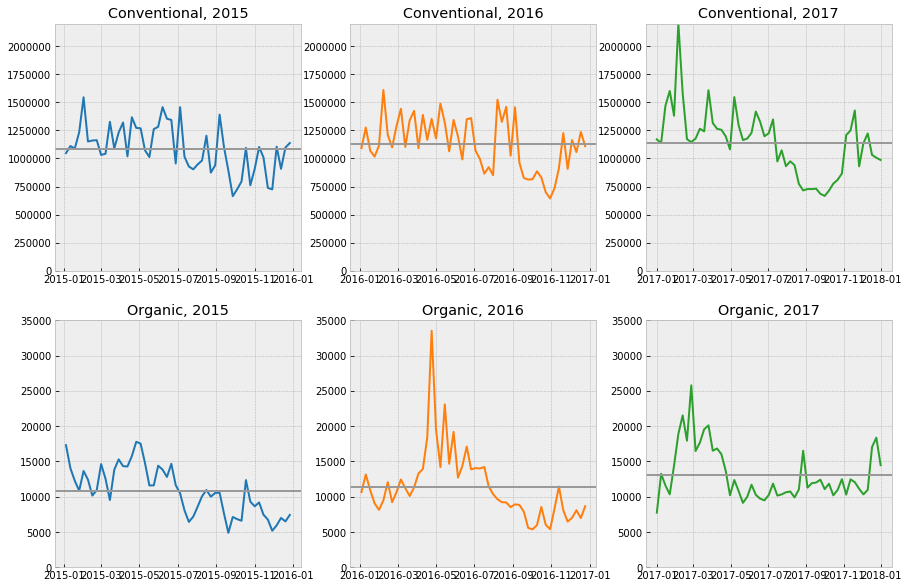

In [80]:
fig, axs = plt.subplots(2,3, figsize=(15,10))

# loop through all years, conventional
for i, year in enumerate([2015, 2016, 2017]):
    yr_df = phxtuc_conv_df.loc[phxtuc_conv_df["Date"].dt.year==year]    
    axs[0][i].plot(yr_df["Date"], yr_df["Total Volume"], color=colors[i])
    axs[0][i].set_ylim(0, 2200000)   
    axs[0][i].set_title(f'Conventional, {year}')
    axs[0][i].axhline(yr_df["Total Volume"].mean(), color='#999999')
    
    
# loop through all year, organic
for i, year in enumerate([2015, 2016, 2017]):
    yr_df = phxtuc_org_df.loc[phxtuc_org_df["Date"].dt.year==year]    
    axs[1][i].plot(yr_df["Date"], yr_df["Total Volume"], color=colors[i])
    axs[1][i].set_ylim(0, 35000)
    axs[1][i].set_title(f'Organic, {year}')
    axs[1][i].axhline(yr_df["Total Volume"].mean(), color='#999999')
    